In [15]:
import jax.numpy as jnp
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
DATA_PATH = 'vcf/Matrix2.csv'

In [17]:
data = pd.read_csv(DATA_PATH, index_col=0) 

In [24]:
def filter_for_sparsity(data, cutoff=1): 
    sum_across_samples = jnp.sum(data.values, axis=1) 
    indices = jnp.where(sum_across_samples > cutoff)
    non_one = data.iloc[indices[0], :] 
    return non_one 

def filter_and_downsample(data, N=1000): 
    non_sparse_odorants = filter_for_sparsity(data)
    random_1000_odorants = non_sparse_odorants.sample(N, replace=False, random_state=0)
    # return random_1000_odorants
    non_zero_sample_indices = jnp.sum(random_1000_odorants.values, axis=0) > 0
    return non_zero_sample_indices
    return random_1000_odorants.iloc[:, non_zero_sample_indices]

In [25]:
subsampled_data = filter_and_downsample(data)

In [28]:
jnp.sum(subsampled_data) 

Array(1294, dtype=int32)

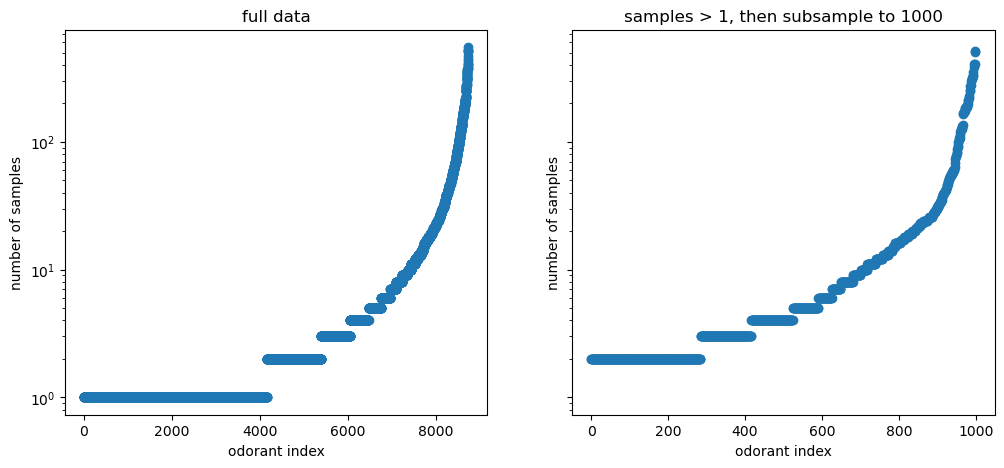

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

def plot_sums(data, ax):
    sums = jnp.sum(data.values, axis=1) 
    ax.scatter(range(len(sums)), jnp.sort(sums))
    ax.set_yscale('log') 
    ax.set_ylabel('number of samples') 
    ax.set_xlabel('odorant index') 
    return sums, ax

plot_sums(data, axs[0]) 
plot_sums(subsampled_data, axs[1]); 
axs[0].set_title('full data') 
axs[1].set_title('samples > 1, then subsample to 1000')
fig.savefig('tmp.png') 

In [7]:
subsampled_data

,ALMOND_HULL_(mission)_10103.html,CHESTNUT_FLOWER_27470.html,ITALIAN_CHESTNUT_(Castanea_sativa_Mill.)_(raw)_27450.html,COCONUT_MILK_8330.html,GREEN_WALNUT_HUSK_(dried_unripe)(Juglans_regia_L.)_10840.html,MACADAMIA_NUT_(Macadamia_integrifolia)_(roasted)_10210.html,ITALIAN_CHESTNUT_(Castanea_sativa_Mill.)_(roasted)_27410.html,PISTACHIO_NUT_(Pistacia_vera)_(roasted)_19620.html,CHINESE_CHESTNUT_(Castanea_molissima)_(boiled)_27440.html,ALMOND_(roasted)_(Prunus_amygdalus)_10101.html,...,POTATO_(raw)_2510.html,BEANS_(raw)_9210.html,POTATO_(cooked_or_boiled)_2540.html,DEFATTED_SOYBEAN_8220.html,NOBIRU_(Allium_grayi_Regal)_2390.html,CABBAGE_(cooked)_1820.html,CHINESE_CABBAGE_21320.html,WELSH_ONION_(Allium_fistulosum_L._var._maichuon)_2392.html,RADISH_(raw)_12610.html,CHILI_PEPPER_PERICARP_(C._baccatum)_2625.html
2-nonenal,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1-tricosanol,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"cis-(2S,5S)-linalool oxide (6)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,3,5-benzenetriol (=phloroglucinol)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cis-piperitol,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2-methyl-2-butenoic acid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hexyl 3-hydroxybutanoate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"3,4-dihydrocoumarin",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dimethyl phthalate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
subsampled_data.to_csv('Matrix2_filtered_and_downsampled_1March2025.csv')